In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0,'/home/pawel1/Pulpit/Astrophysics/CTA/soft/ctapipe_io_lst')
sys.path.insert(0, '/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain')

from ctapipe_io_lst import LSTEventSource
from traitlets.config.loader import Config 
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay

from lstchain.calib.camera.r0 import LSTR0Corrections

from pulse_correction import PulseCorrection

plt.rcParams['font.size'] = 30

In [3]:
config_corr = Config({
    "LSTR0Corrections": {
        "pedestal_path": "/media/pawel1/ADATA HD330/20190215/pedestal_run97_new.fits",
        "offset":  400}
})

hf = h5py.File('coeff_run250_n_harm_16.h5', 'r')
fan = hf.get('fan')
fan_array = np.array(fan)
fbn = hf.get('fbn')
fbn_array = np.array(fbn)
#n_harm = hf.attrs['n_harm']
hf.close()

In [4]:
input_file_2 = "/media/pawel1/ADATA HD330/20190312/LST-1.*.Run00252.0000.fits.fz"
#input_file_2 = "/media/pawel1/ADATA HD330/20190226/LST-1.*.Run00171.0001.fits.fz"
N_events = 1000
reader = LSTEventSource(input_url=input_file_2, max_events=N_events)
lst_r0 = LSTR0Corrections(config=config_corr)

n_harm = 16
pulse_corr = PulseCorrection(fan_array, fbn_array, n_harm)

for i, ev in enumerate(reader):
    print(i)
        
    lst_r0.calibrate(ev)
    pulse_corr.corr_pulse(ev)

0
1
2
3
4
Weights sum to zero, can't be normalized
5
6
7
8
Weights sum to zero, can't be normalized
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
Weights sum to zero, can't be normalized
63
64
65
66
Weights sum to zero, can't be normalized
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
Weights sum to zero, can't be normalized
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
Weights sum to zero, can't be normalized
135
136
137
138
139
140
141
142
143
144
145
146
Weights sum to zero, can't be normalized
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
Weights sum to zero, can't be normalized
190
191
192
193
194
19

In [5]:
raw_pulse_list = pulse_corr.get_raw_pulse_list()
corr_pulse_list = pulse_corr.get_corr_pulse_list()
corr_mean_pulse_list = pulse_corr.get_corr_mean_pulse_list()
mean_time_list = pulse_corr.mean_time_list

0.936271682454878


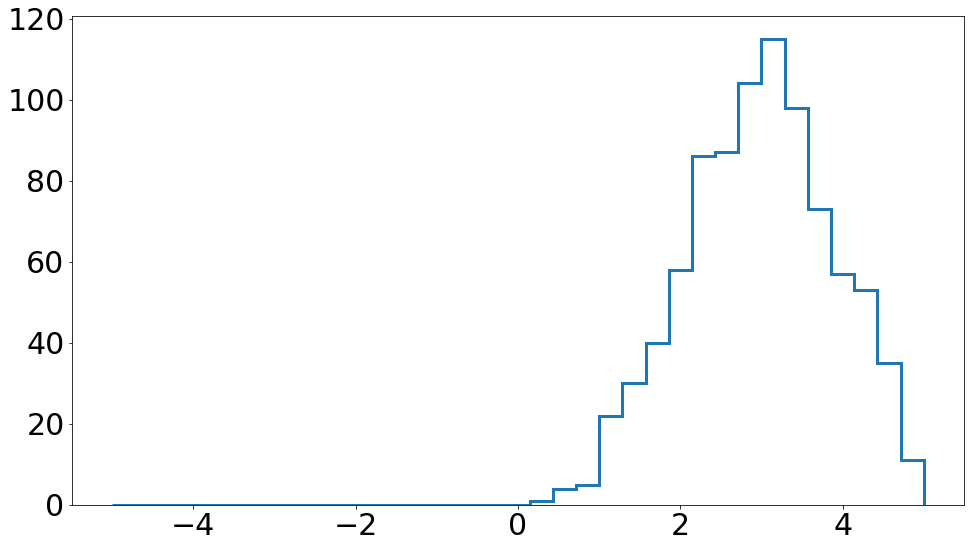

In [6]:
plt.figure(figsize=(16, 9))
plt.hist(mean_time_list, bins=35, range=(-5, 5), histtype='step',lw=3)
print(np.std(mean_time_list))

0.10331834320991401
0.39588721183706704
0.4280566324634931


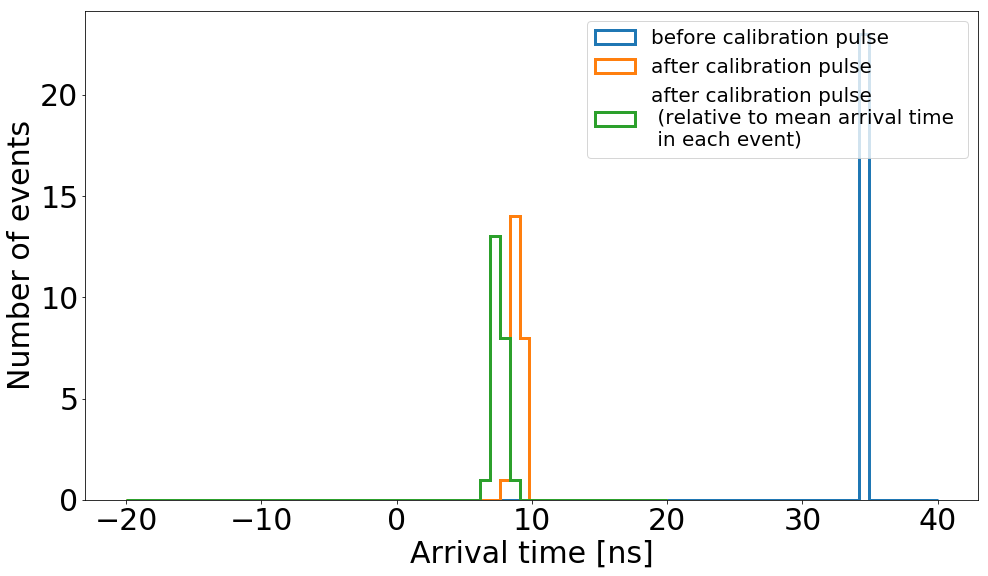

In [87]:
pixel_i = 1052
plt.figure(figsize=(16, 9))
plt.hist(raw_pulse_list[pixel_i], bins=55, range=(0, 40), histtype='step',lw=3, 
        label="before calibration pulse")
plt.hist(corr_pulse_list[pixel_i], bins=55, range=(-20, 20), histtype='step',lw=3,
         label="after calibration pulse")
plt.hist(corr_mean_pulse_list[pixel_i], bins=55, range=(-20, 20), histtype='step',lw=3,
        label="after calibration pulse \n (relative to mean arrival time \n in each event)")
plt.xlabel("Arrival time [ns]")
plt.ylabel("Number of events")
plt.legend(fontsize=20)
#plt.xlim([-5, 20])


print(np.std(raw_pulse_list[pixel_i]))
print(np.std(corr_pulse_list[pixel_i]))
print(np.std(corr_mean_pulse_list[pixel_i]))
#plt.savefig("hist_corr.png")
plt.show()

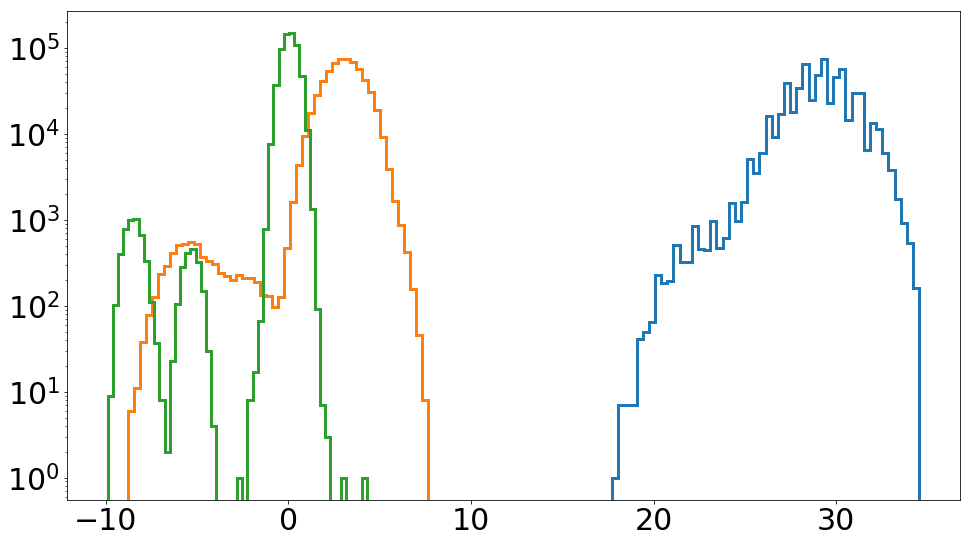

In [46]:
len(raw_pulse_list)
raw_pulse_all = []
corr_pulse_all = []
corr_pulse_mean_all = []
for i in range(0, 690):
    raw_pulse_all.extend(raw_pulse_list[i])
    corr_pulse_all.extend(corr_pulse_list[i])
    corr_pulse_mean_all.extend(corr_mean_pulse_list[i])

clean_corr_pulse_all = [x for x in corr_pulse_all if str(x) != 'nan']    
clean_corr_mean_pulse_all = [x for x in corr_pulse_mean_all if str(x) != 'nan']   

plt.figure(figsize=(16, 9))
plt.hist(raw_pulse_all, histtype="step", lw=3, bins=50)
plt.hist(clean_corr_pulse_all, histtype="step", lw=3, bins=50)
plt.hist(clean_corr_mean_pulse_all, histtype="step", lw=3, bins=50)
plt.yscale('log')
plt.show()

In [61]:
for i in range(0, 1855):

    if np.sum(np.array(corr_mean_pulse_list[i])>3)  > 1 or np.sum(np.array(corr_mean_pulse_list[i]))>-3  > 1:
        print(i)

696
697
790
791
792
838
839
891
892
941
943
1052
1494
1495
1611
1612
1613
1711
1712


/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


584
585
651
652
670
671
672
696
697
742
743
744
763
764
790
791
792
838
839
840
841
891
892
897
941
943
951
952
1052
1060
1061
1062
1114
1176
1177
1494
1495
1611
1612
1613
1711
1712


/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


711
809
810
913
914
1140
1270
1527


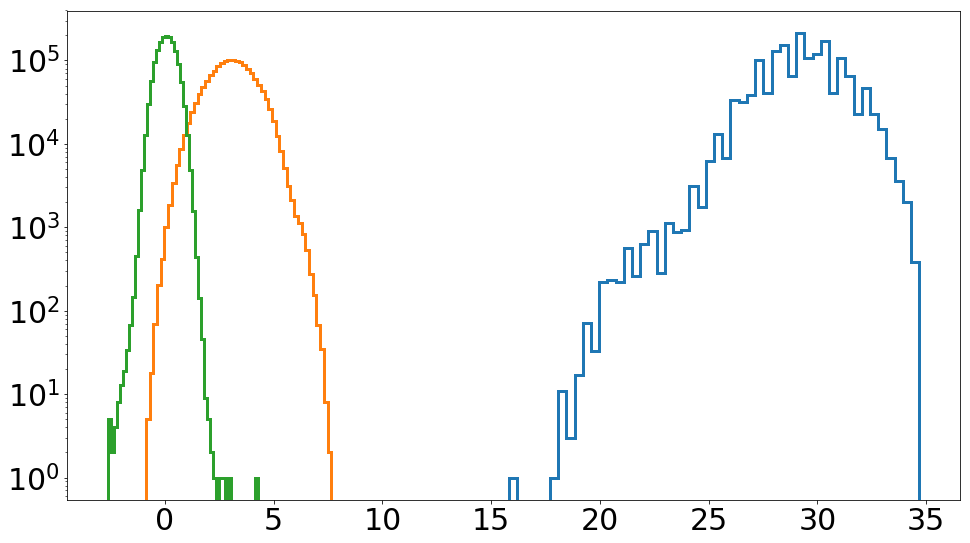

In [85]:
len(raw_pulse_list)
raw_pulse_all = []
corr_pulse_all = []
corr_pulse_mean_all = []
bad_pixels_id_list = []

for i in range(0, 1855):
    if np.sum(np.array(corr_mean_pulse_list[i])>5)  == 0 and np.sum(np.array(corr_mean_pulse_list[i])<-5)  == 0:
        raw_pulse_all.extend(raw_pulse_list[i])
        corr_pulse_all.extend(corr_pulse_list[i])
        corr_pulse_mean_all.extend(corr_mean_pulse_list[i])
    else:
        print(i)
        bad_pixels_id_list.append(i)

for i in range(0, 1855):
    if np.sum(np.isnan(corr_mean_pulse_list[i])) > 1:
        print(i)
        bad_pixels_id_list.append(i)
              
clean_corr_pulse_all = [x for x in corr_pulse_all if str(x) != 'nan']    
clean_corr_mean_pulse_all = [x for x in corr_pulse_mean_all if str(x) != 'nan']   

plt.figure(figsize=(16, 9))
plt.hist(raw_pulse_all, histtype="step", lw=3, bins=50)
plt.hist(clean_corr_pulse_all, histtype="step", lw=3, bins=50)
plt.hist(clean_corr_mean_pulse_all, histtype="step", lw=3, bins=50)
plt.yscale('log')
plt.show()

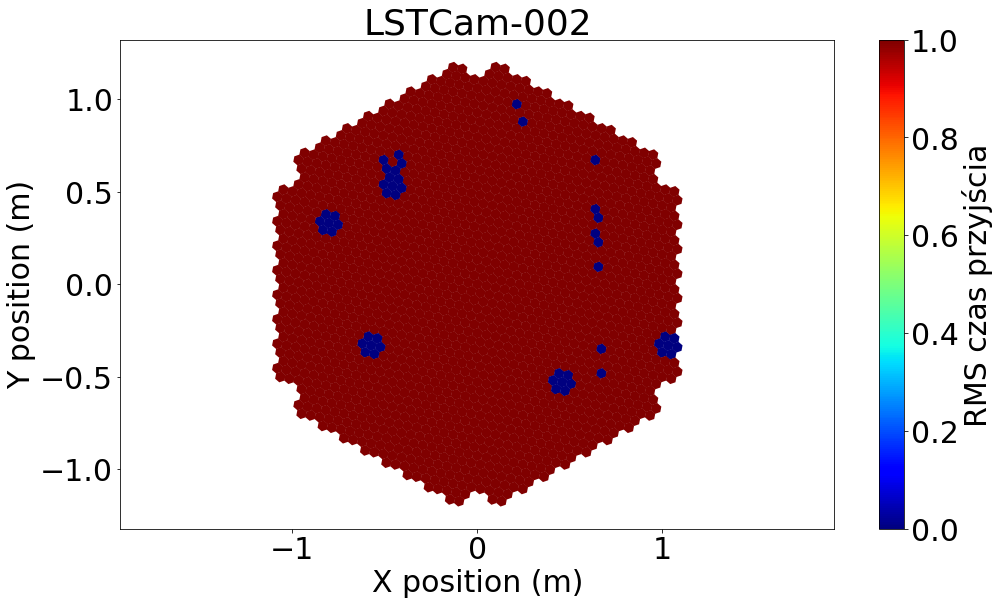

In [86]:
x = np.ones(1855)
x[bad_pixels_id_list] = 0

fig, ax = plt.subplots(figsize=(16,9))

disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax)
disp0.cmap = 'jet'
disp0.image = x
disp0.add_colorbar(ax=ax, label="RMS czas przyjścia")


In [76]:
print(np.std(raw_pulse_all))
print(np.std(clean_corr_pulse_all))
print(np.std(clean_corr_mean_pulse_all))

1.708255199740836
1.0320303392825778
0.4159248402843458


In [ ]:
pixel_i = 22
plt.figure(figsize=(16, 9))
plt.hist(raw_pulse_list[pixel_i], bins=55, range=(26, 36), histtype='step',lw=3, 
        label="before calibration pulse")
plt.hist(corr_pulse_list[pixel_i], bins=55, range=(-5, 5), histtype='step',lw=3,
         label="after calibration pulse")
plt.hist(corr_mean_pulse_list[pixel_i], bins=55, range=(-5, 5), histtype='step',lw=3,
        label="after calibration pulse \n (relative to mean arrival time \n in each event)")
plt.xlabel("Arrival time [ns]")
plt.ylabel("Number of events")
plt.legend(fontsize=20)

In [ ]:
raw_pulse_list[1612]

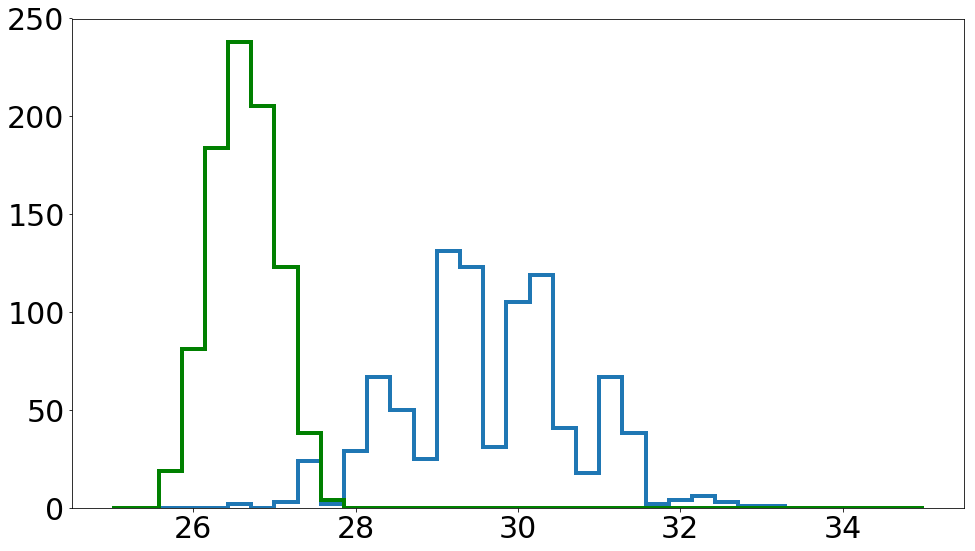

In [19]:
pixel_i = 1280
plt.figure(figsize=(16, 9))
plt.hist(raw_pulse_list[pixel_i], bins=35, range=(25, 35), histtype='step',lw=4)
plt.hist(np.array(corr_mean_pulse_list[pixel_i]) + fan_array[pixel_i][0]/2, bins=35, 
         range=(25, 35), histtype='step',lw=4, color='green')
plt.show()

In [8]:
expected_pixel_id = ev.lst.tel[0].svc.pixel_ids
std_raw_pulse = np.zeros(1855)
std_corr_pulse = np.zeros(1855)
std_corr_mean_pulse = np.zeros(1855)
for nr in range(0, 265):
    for pix in range(0, 7):
        pixel_id = expected_pixel_id[nr*7 + pix]
        std_arrival = np.nanstd(raw_pulse_list[pixel_id])
        std_corr_arrival = np.nanstd(corr_pulse_list[pixel_id])
        std_corr_mean_arrival = np.nanstd(corr_mean_pulse_list[pixel_id])
        std_raw_pulse[pixel_id] = (std_arrival)
        std_corr_pulse[pixel_id] = (std_corr_arrival)
        std_corr_mean_pulse[pixel_id] = (std_corr_mean_arrival)

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


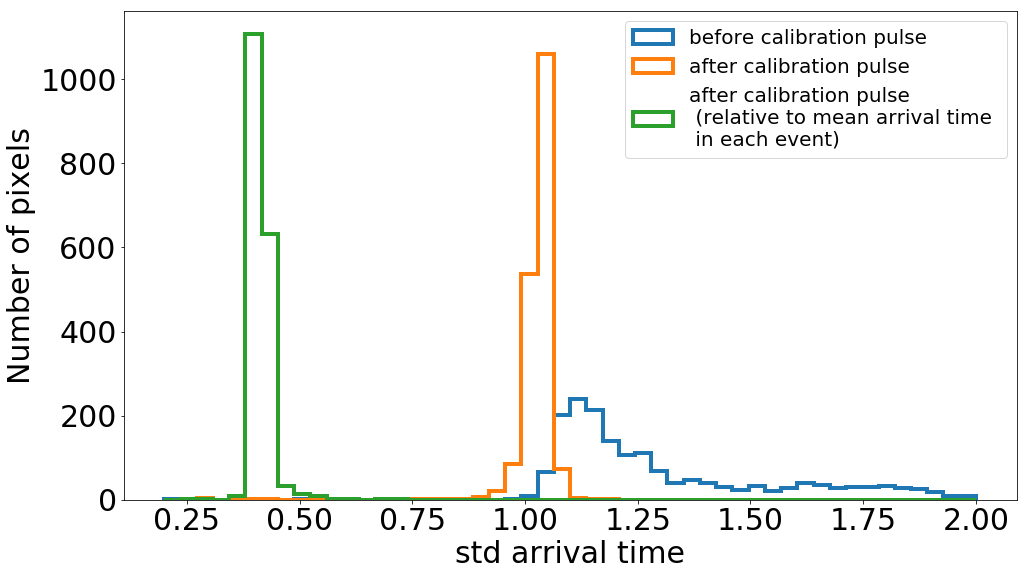

In [9]:
plt.figure(figsize=(16, 9))
plt.hist(std_raw_pulse, bins=50, range=(0.2, 2), histtype='step', lw=4, 
        label="before calibration pulse")
plt.hist(std_corr_pulse, bins=50, range=(0.2, 2), histtype='step', lw=4, 
        label="after calibration pulse")
plt.hist(std_corr_mean_pulse, bins=50, range=(0.2, 2), histtype='step', lw=4,
        label="after calibration pulse \n (relative to mean arrival time \n in each event)")
#plt.yscale('log')
plt.ylabel("Number of pixels")
plt.xlabel("std arrival time")
plt.legend(fontsize=20)
plt.savefig("hist_std.png")
plt.show()

In [10]:
print(np.nanmean(std_raw_pulse))
print(np.nanmean(std_corr_pulse))
print(np.nanmean(std_corr_mean_pulse))


1.3386659769258924
1.0266437434769111
0.41457712153450155


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,9))

disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax[0])
disp0.cmap = 'jet'
disp0.image = np.nan_to_num(std_raw_pulse)
disp0.add_colorbar(ax=ax[0], label="RMS czas przyjścia")
disp0.set_limits_minmax(0.5, 2.5)    
disp0.cmap.set_under('black')        
disp0.cmap.set_under('black')

disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax[1])
disp0.cmap = 'jet'
disp0.image = np.nan_to_num(std_corr_pulse)
disp0.add_colorbar(ax=ax[1], label="RMS czas przyjścia")
disp0.set_limits_minmax(0.5, 2.5)
disp0.cmap.set_under('black')